In [1]:
import sys
import datetime
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sys.path.append('../')
from src.util.functions import Functions
from src.visualize.visualizer import BarPlot 

level = 'andamento-nazionale'

path_data = '../data'
path_img_root =  '{path_data}/imgs/grafici/{level}'.format(path_data=path_data, level=level)
path_csv = '{path_data}/csv'.format(path_data=path_data)
csv_in_name = '{path_csv}/covid19-{level}.csv'.format(path_csv=path_csv, level=level)

In [2]:
df_n_raw = pd.read_csv(csv_in_name)
df_n_raw;
df_n_raw.columns

Index(['data', 'ricoverati_con_sintomi', 'terapia_intensiva',
       'totale_ospedalizzati', 'isolamento_domiciliare', 'totale_positivi',
       'variazione_totale_positivi', 'nuovi_positivi', 'dimessi_guariti',
       'deceduti', 'casi_da_sospetto_diagnostico', 'casi_da_screening',
       'totale_casi', 'tamponi', 'casi_testati', 'ingressi_terapia_intensiva',
       'note_test', 'note_casi', 'variazione_terapia_intensiva',
       'variazione_ricoverati_con_sintomi', 'variazione_totale_ospedalizzati',
       'variazione_isolamento_domiciliare', 'nuovi_dimessi_guariti',
       'nuovi_deceduti', 'nuovi_tamponi', 'nuovi_casi_testati', 'ti_su_to',
       'to_su_tp', 'np_su_nt', 'np_su_nct', 'var_ti_perc', 'var_pos_perc'],
      dtype='object')

In [3]:
# df_n[-2:].iloc[:, 1:]
df_last = df_n_raw[-1:]

In [4]:
type(df_last['nuovi_positivi'].item())

int

In [5]:
# Print stats
print('Nuovi positivi:', df_last['nuovi_positivi'].item())
print('Nuovi tamponi:', df_last['nuovi_tamponi'].item())
print('Percentuale nuovi positivi/nuovi tamponi:', round(df_last['nuovi_positivi'].item()/df_last['nuovi_tamponi'].item(), 2) * 100, '%')
print('Nuovi guariti:', df_last['nuovi_dimessi_guariti'].item())
print('Nuovi deceduti:', df_last['nuovi_deceduti'].item())
print('Variazione positivi ricoverati con sintomi:', df_last['variazione_ricoverati_con_sintomi'].item())
print('Variazione positivi in terapia intensiva:', df_last['variazione_terapia_intensiva'].item())
print('Variazione positivi in isolamento dimiciliare:', df_last['variazione_isolamento_domiciliare'].item())

Nuovi positivi: 16308
Nuovi tamponi: 176185.0
Percentuale nuovi positivi/nuovi tamponi: 9.0 %
Nuovi guariti: 23384.0
Nuovi deceduti: 553.0
Variazione positivi ricoverati con sintomi: -405.0
Variazione positivi in terapia intensiva: -35.0
Variazione positivi in isolamento dimiciliare: -7192.0


In [6]:
last_date = datetime.datetime.fromisoformat(df_n_raw.tail(1).data.array[0])
last_date

datetime.datetime(2020, 12, 19, 17, 0)

In [7]:
# TODO: define function
days = 60
path_img = '{path_img_root}/{days}gg'.format(path_img_root=path_img_root, days=days)
date_threshold = Functions.get_prev_days_date(last_date, days).toordinal()
date_threshold_str = datetime.datetime.fromordinal(date_threshold).isoformat()
date_threshold_str
df_n = df_n_raw[df_n_raw.data > date_threshold_str].reset_index(drop=True)
df_n

,data,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,dimessi_guariti,deceduti,...,nuovi_dimessi_guariti,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2020-10-20T17:00:00,8454,870,9324,133415,142739,8736,10874,255005,36705,...,2046.0,89.0,144737.0,87680.0,9.33,6.53,7.51,12.40,9.16,6.52
1,2020-10-21T17:00:00,9057,926,9983,145459,155442,12703,15199,257374,36832,...,2369.0,127.0,177848.0,106488.0,9.28,6.42,8.55,14.27,6.44,8.90
2,2020-10-22T17:00:00,9694,992,10686,158616,169302,13860,16079,259456,36968,...,2082.0,136.0,170392.0,104872.0,9.28,6.31,9.44,15.33,7.13,8.92
3,2020-10-23T17:00:00,10549,1049,11598,174404,186002,16700,19143,261808,37059,...,2352.0,91.0,182032.0,114499.0,9.04,6.24,10.52,16.72,5.75,9.86
4,2020-10-24T17:00:00,11287,1128,12415,190767,203182,17180,19644,264117,37210,...,2309.0,151.0,177669.0,109673.0,9.09,6.11,11.06,17.91,7.53,9.24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,2020-12-15T17:00:00,27342,3003,30345,632968,663313,-11796,14844,1141406,65857,...,25789.0,846.0,164431.0,64237.0,9.90,4.57,9.03,23.11,-2.97,-1.75
57,2020-12-16T17:00:00,26897,2926,29823,615883,645706,-17607,17572,1175901,66537,...,34495.0,680.0,199489.0,78972.0,9.81,4.62,8.81,22.25,-2.56,-2.65
58,2020-12-17T17:00:00,26427,2855,29282,606061,635343,-10363,18236,1203814,67220,...,27913.0,683.0,-47510.0,80778.0,9.75,4.61,-38.38,22.58,-2.43,-1.60
59,2020-12-18T17:00:00,25769,2819,28588,599210,627798,-7545,17992,1226086,67894,...,22272.0,674.0,179800.0,-96651.0,9.86,4.55,10.01,-18.62,-1.26,-1.19


In [8]:
# Define figures properties
graph_prop = {'path_root': path_img,
              'label_font': 14,
              'data': {'label': 'Data', 'ticks': lambda x: x.split('T')[0]},
              'nuovi_positivi': {'label': 'Nuovi positivi', 'file_name': 'nuovi_positivi'},
              'np_su_nt': {'label': 'Nuovi positivi / Nuovi tamponi (%)', 'file_name': 'nuovi_positivi_su_nuovi_tamponi'},
              'np_su_nct': {'label': 'Nuovi positivi / Nuovi casi testati (%)', 'file_name': 'nuovi_positivi_su_nuovi_casi_testati'},
              'totale_positivi': {'label': 'Totale positivi', 'file_name': 'totale_positivi'},
              'var_pos_perc': {'label': 'Variazione totale positivi (%)', 'file_name': 'variazione_totale_positivi_perc'},
              'terapia_intensiva': {'label': 'Terapia intensiva', 'file_name': 'terapia_intensiva'},
              'var_ti_perc': {'label': 'Variazione terapia intensiva (%)', 'file_name': 'variazione_terapia_intensiva_perc'},
              'ti_su_to': {'label': 'Terapia intensiva / Totale ospedalizzati (%)', 'file_name': 'terapia_intensiva_su_totale_ospedalizzati'},
              'saturazione_terapia_intensiva': {'label': 'Saturazione terapia intensiva (%)', 'file_name': 'saturazione_terapia_intensiva'},
              'totale_ospedalizzati': {'label': 'Totale ospedalizzati', 'file_name': 'totale_ospedalizzati'},
              'to_su_tp': {'label': 'Totale ospedalizzati / Totale positivi (%)', 'file_name': 'totale_ospedalizzati_su_totale_positivi'},
              'nuovi_deceduti': {'label': 'Nuovi deceduti', 'file_name': 'nuovi_deceduti'},
              'nuovi_dimessi_guariti': {'label': 'Nuovi dimessi guariti', 'file_name': 'nuovi_dimessi_guariti'}}

# Create BarPlot object
bp = BarPlot(df_n, 'data', graph_prop)

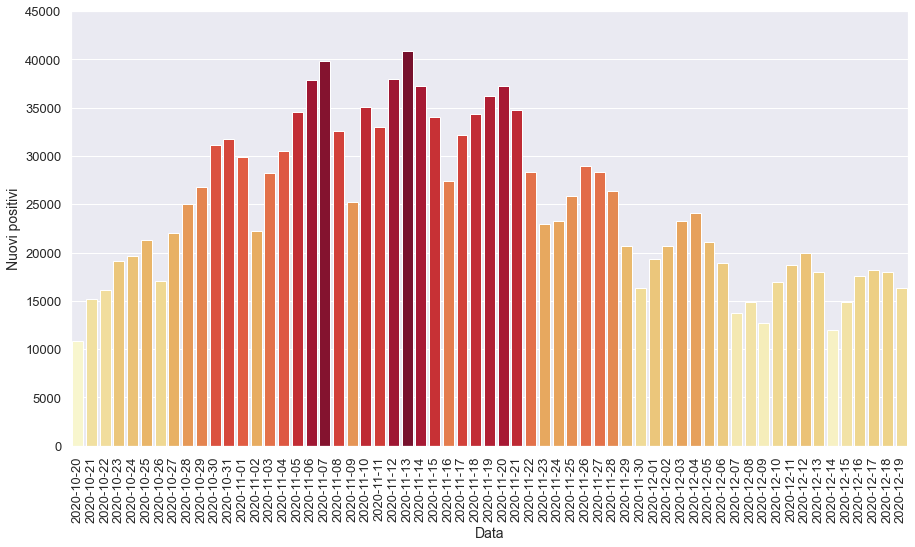

In [9]:
# New positives on new swabs in the last 60 days
y_col = 'nuovi_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

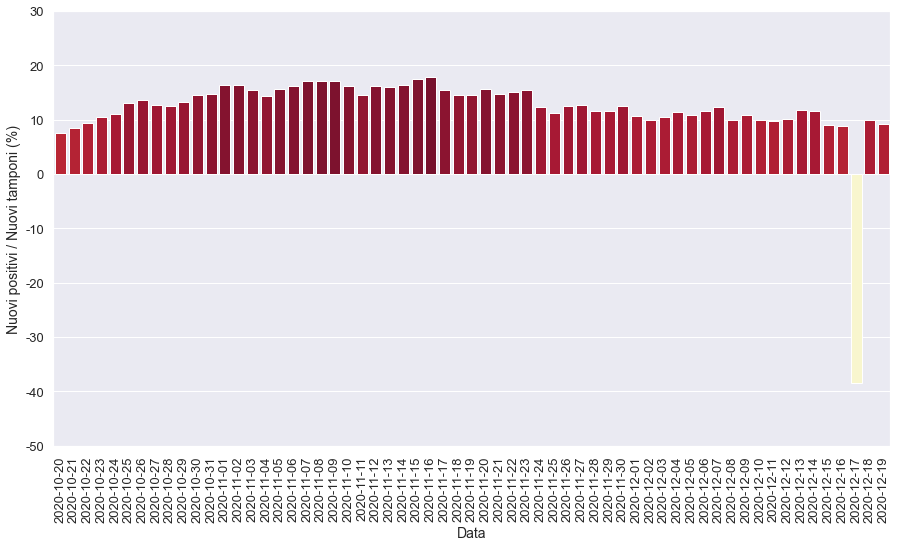

In [10]:
# New positives on new swabs in the last 60 days
y_col = 'np_su_nt'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

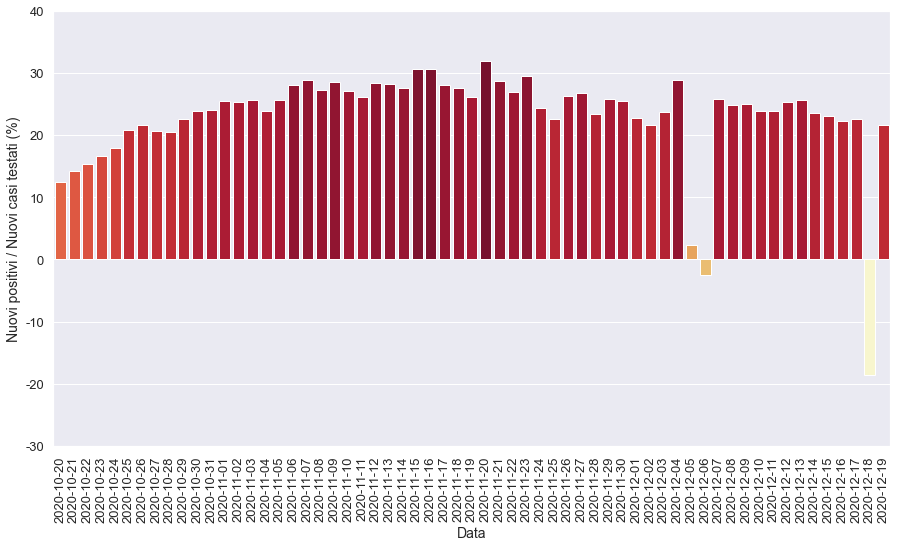

In [11]:
# New positives on new tested cases in the last 60 days
y_col = 'np_su_nct'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

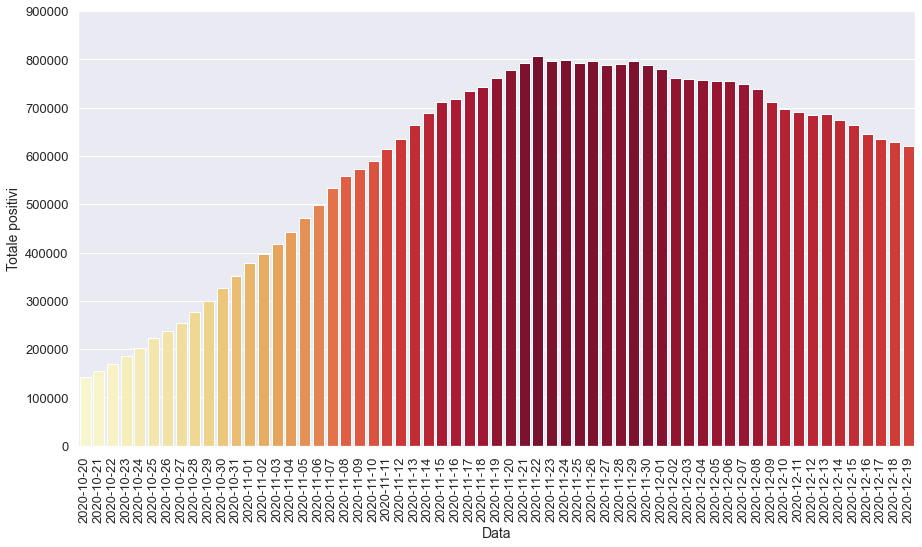

In [12]:
# Percentage of variation of positives in the last 60 days
y_col = 'totale_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

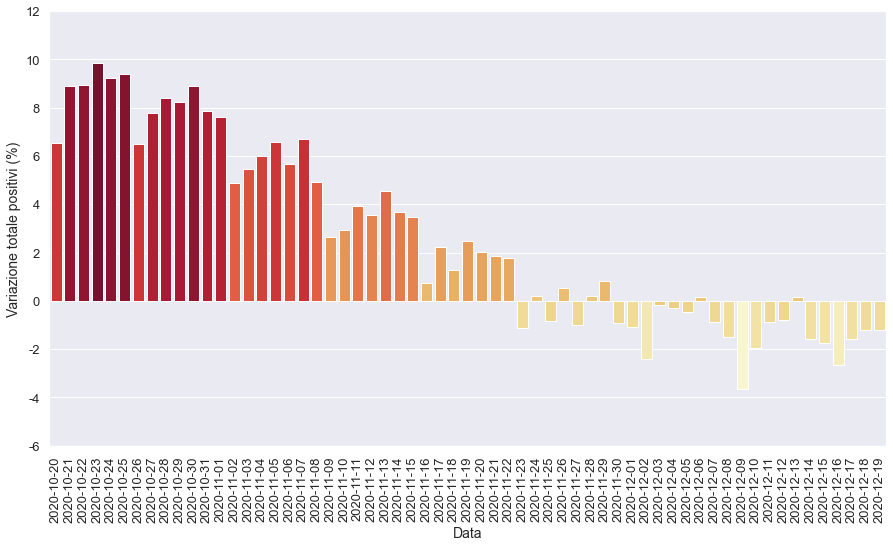

In [13]:
# Percentage of variation of total positives in the last 60 days
y_col = 'var_pos_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

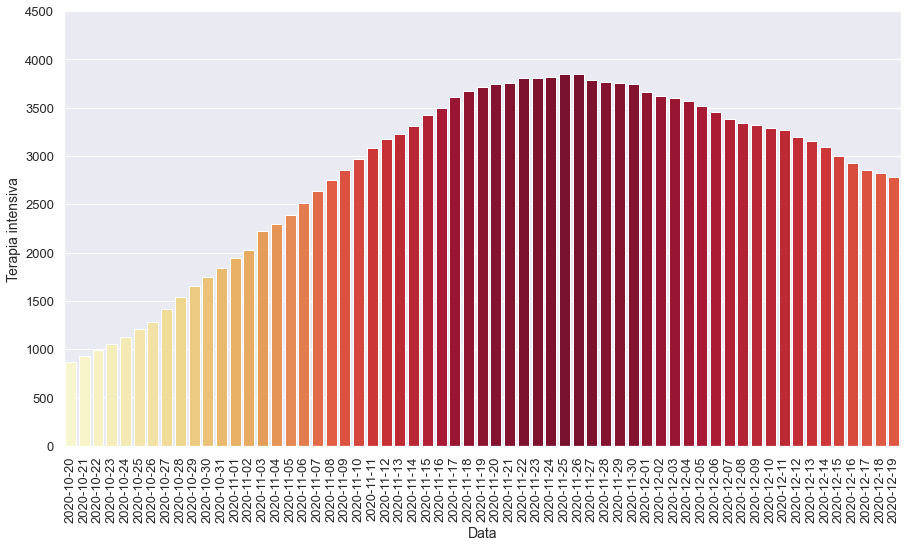

In [14]:
# Positives in ICU in the last 60 days
y_col = 'terapia_intensiva'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

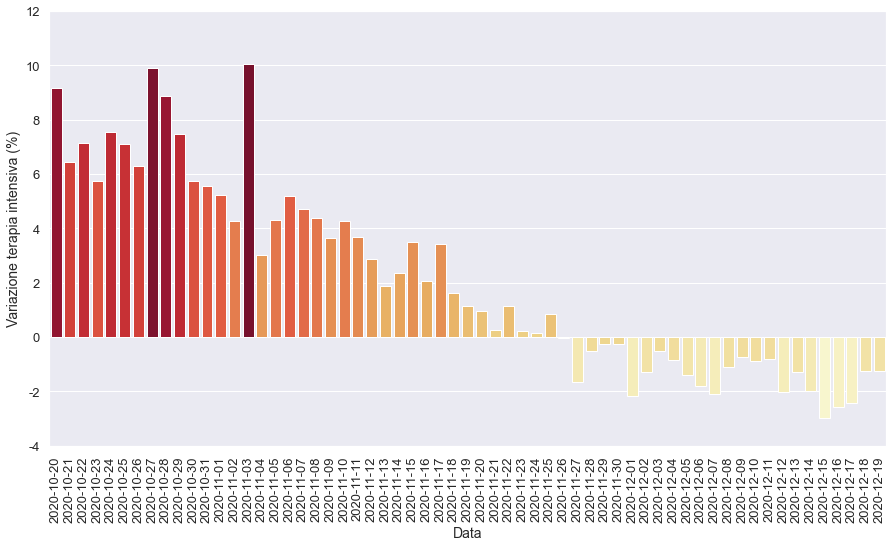

In [15]:
# Percentage of variation of positives in ICU in the last 60 days
y_col = 'var_ti_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

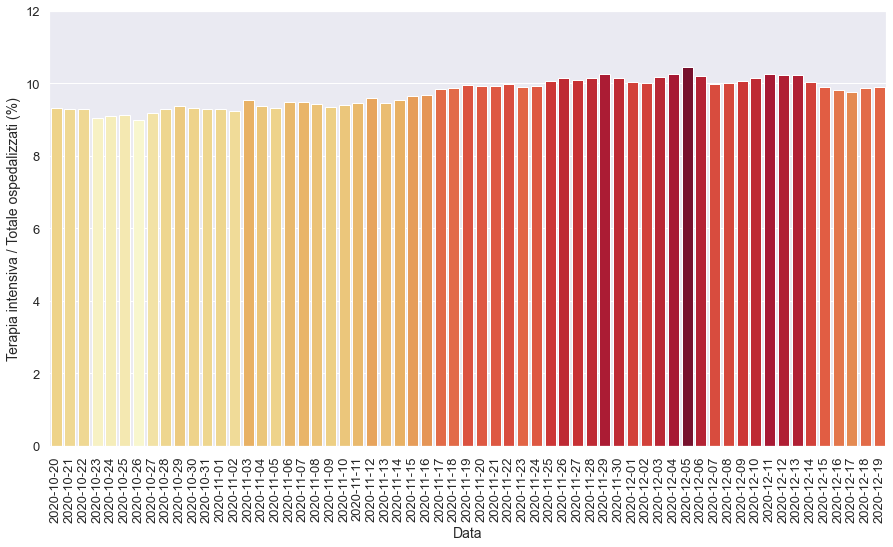

In [16]:
# Positives in ICU in the last 60 days
y_col = 'ti_su_to'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

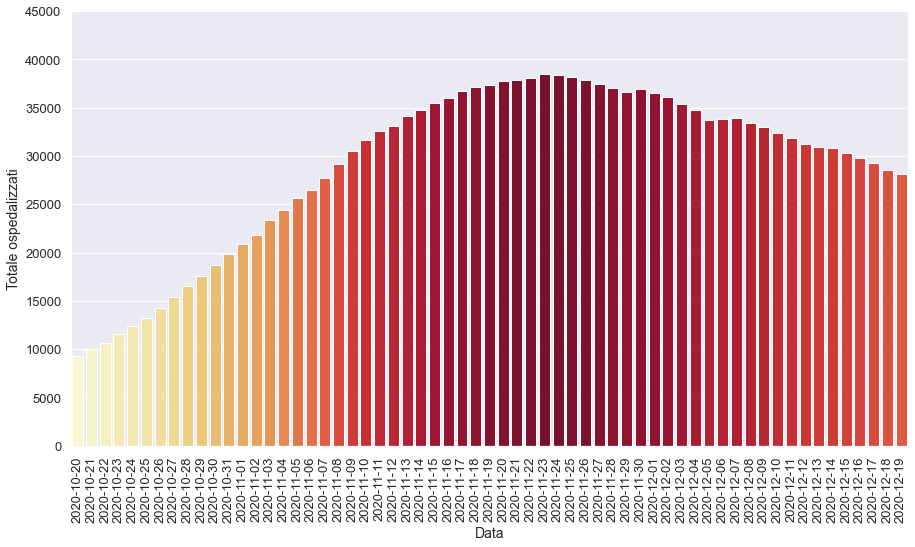

In [17]:
# Hospitalized positives in the last 60 days
y_col = 'totale_ospedalizzati'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

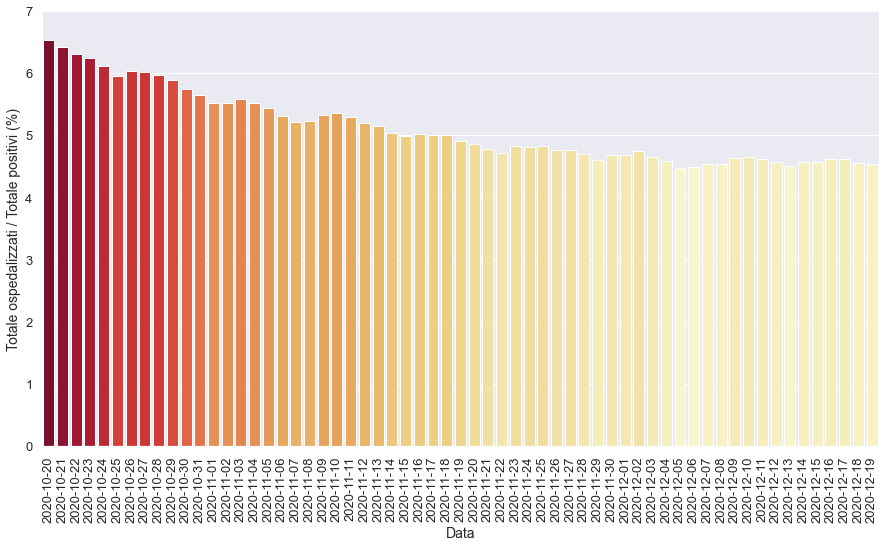

In [18]:
# Hospitalized positives in the last 60 days
y_col = 'to_su_tp'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

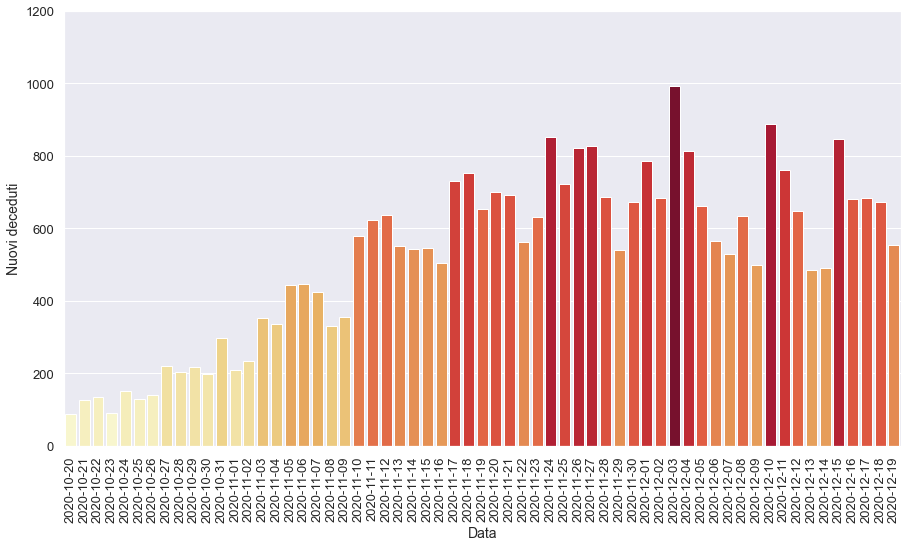

In [19]:
# New deads in the last 60 days
y_col = 'nuovi_deceduti'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

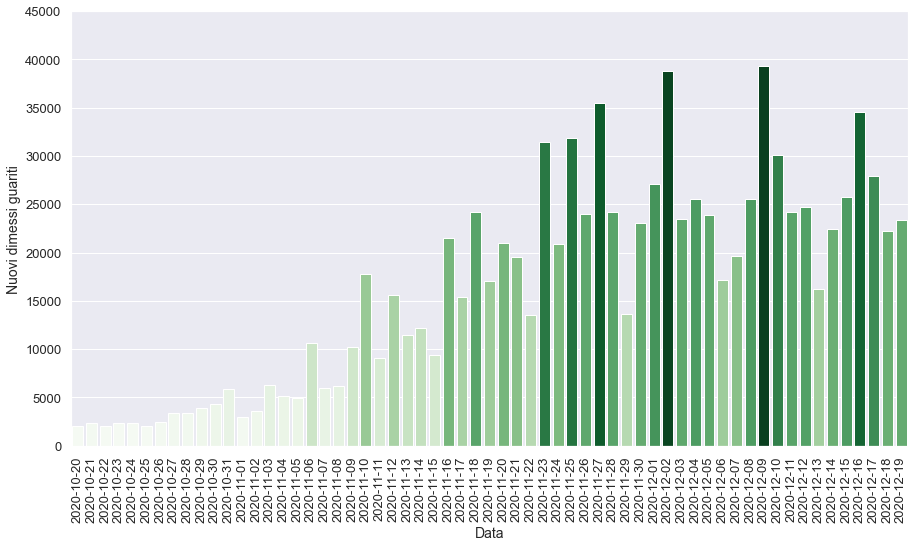

In [20]:
# New healed in the last 60 days
y_col = 'nuovi_dimessi_guariti'
fig = bp.draw_bar_plot(y_col=y_col, color='Greens')
bp.save(fig=fig, y_col=y_col)

In [21]:
# TODO: define function
days = 30
path_img = '{path_img_root}/{days}gg'.format(path_img_root=path_img_root, days=days)
date_threshold = Functions.get_prev_days_date(last_date, days).toordinal()
date_threshold_str = datetime.datetime.fromordinal(date_threshold).isoformat()
date_threshold_str
df_n = df_n_raw[df_n_raw.data > date_threshold_str].reset_index(drop=True)
df_n;

,data,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,dimessi_guariti,deceduti,...,nuovi_dimessi_guariti,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2020-11-19T17:00:00,33610,3712,37322,724349,761671,18503,36176,498987,47870,...,17020.0,653.0,250186.0,138397.0,9.95,4.90,14.46,26.14,1.14,2.49
1,2020-11-20T17:00:00,33957,3748,37705,739471,777176,15505,37242,520022,48569,...,21035.0,699.0,238077.0,116853.0,9.94,4.85,15.64,31.87,0.97,2.04
2,2020-11-21T17:00:00,34063,3758,37821,753925,791746,14570,34767,539524,49261,...,19502.0,692.0,237225.0,121315.0,9.94,4.78,14.66,28.66,0.27,1.87
3,2020-11-22T17:00:00,34279,3801,38080,767867,805947,14201,28337,553098,49823,...,13574.0,562.0,188747.0,104861.0,9.98,4.72,15.01,27.02,1.14,1.79
4,2020-11-23T17:00:00,34697,3810,38507,758342,796849,-9098,22930,584493,50453,...,31395.0,630.0,148945.0,77855.0,9.89,4.83,15.39,29.45,0.24,-1.13
5,2020-11-24T17:00:00,34577,3816,38393,759993,798386,1537,23232,605330,51306,...,20837.0,853.0,188659.0,95247.0,9.94,4.81,12.31,24.39,0.16,0.19
6,2020-11-25T17:00:00,34313,3848,38161,753536,791697,-6689,25853,637149,52028,...,31819.0,722.0,230007.0,114177.0,10.08,4.82,11.24,22.64,0.84,-0.84
7,2020-11-26T17:00:00,34038,3846,37884,757961,795845,4148,29003,661180,52850,...,24031.0,822.0,232711.0,110261.0,10.15,4.76,12.46,26.30,-0.05,0.52
8,2020-11-27T17:00:00,33684,3782,37466,750427,787893,-7952,28352,696647,53677,...,35467.0,827.0,222803.0,106021.0,10.09,4.76,12.73,26.74,-1.66,-1.00
9,2020-11-28T17:00:00,33299,3762,37061,752247,789308,1415,26323,720861,54363,...,24214.0,686.0,225940.0,112839.0,10.15,4.70,11.65,23.33,-0.53,0.18


In [22]:
bp.df = df_n
graph_prop['path_root'] = path_img
bp.graph_prop = graph_prop

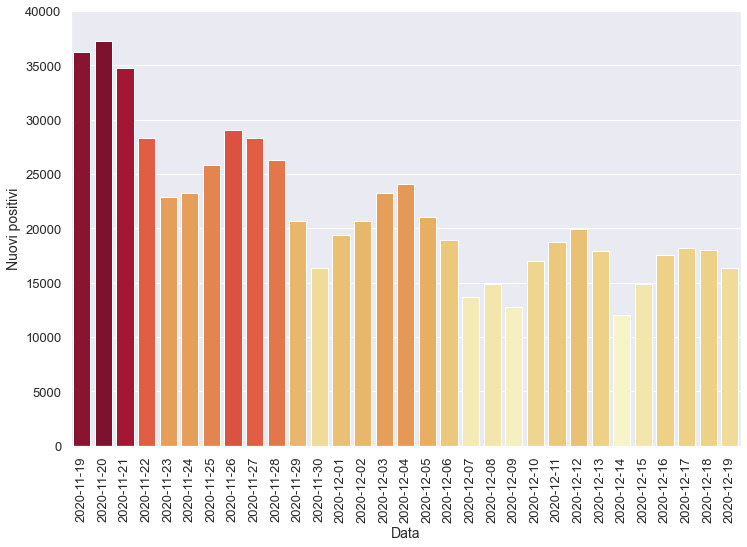

In [23]:
# New positives on new swabs in the last 30 days
y_col = 'nuovi_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

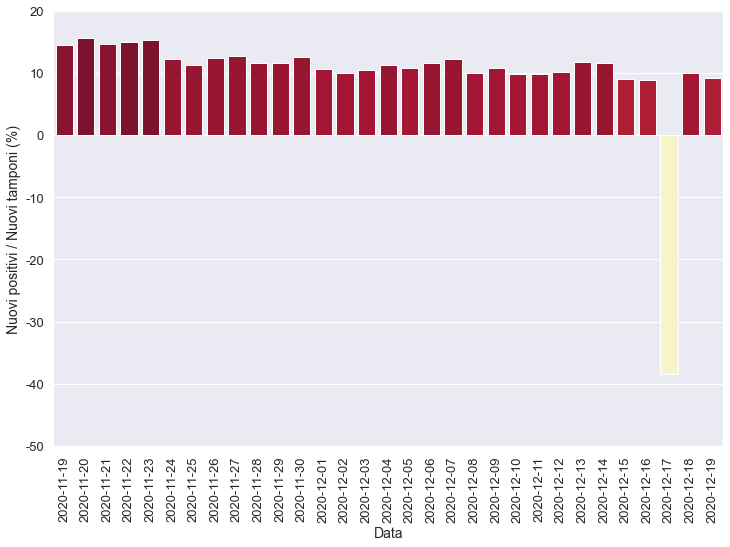

In [24]:
# New positives on new swabs in the last 30 days
y_col = 'np_su_nt'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

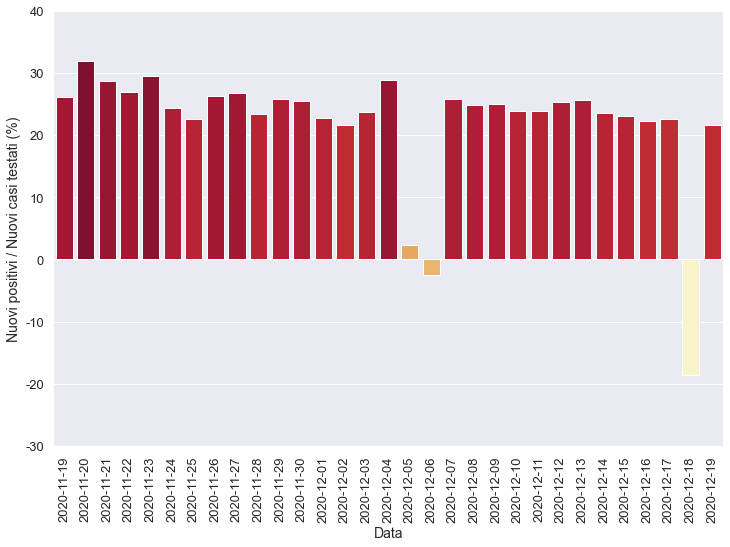

In [25]:
# New positives on new tested cases in the last 30 days
y_col = 'np_su_nct'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

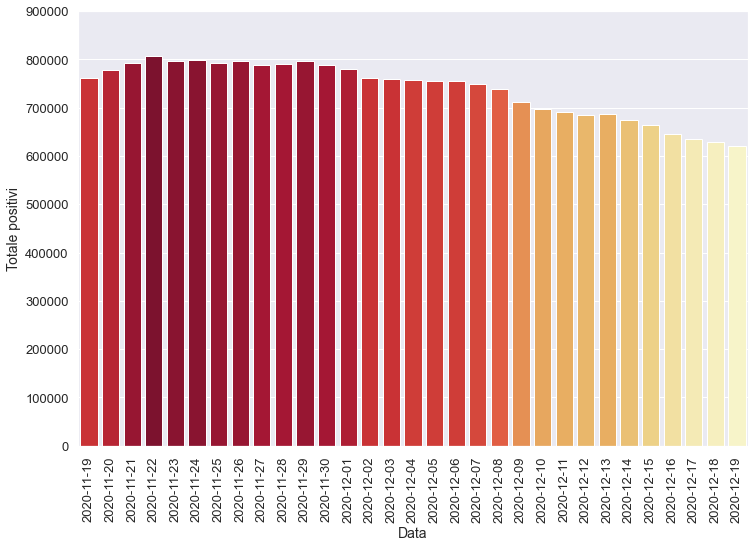

In [26]:
# Number of positives in the last 30 days
y_col = 'totale_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

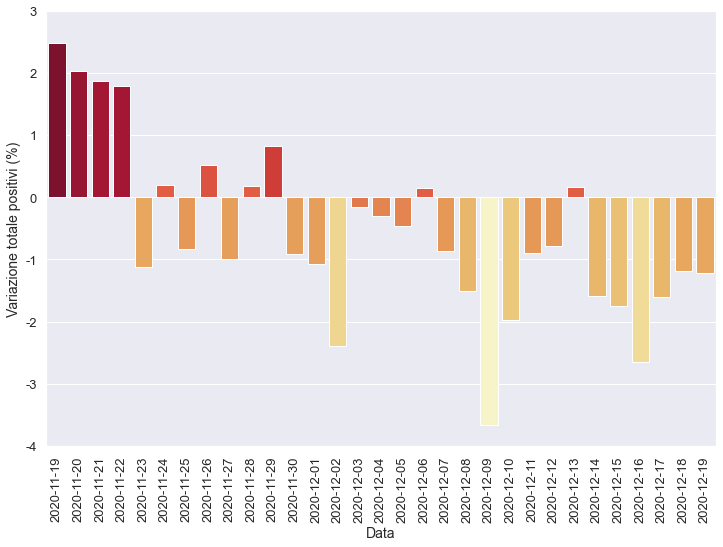

In [27]:
# Percentage of variation of positives in the last 30 days
y_col = 'var_pos_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

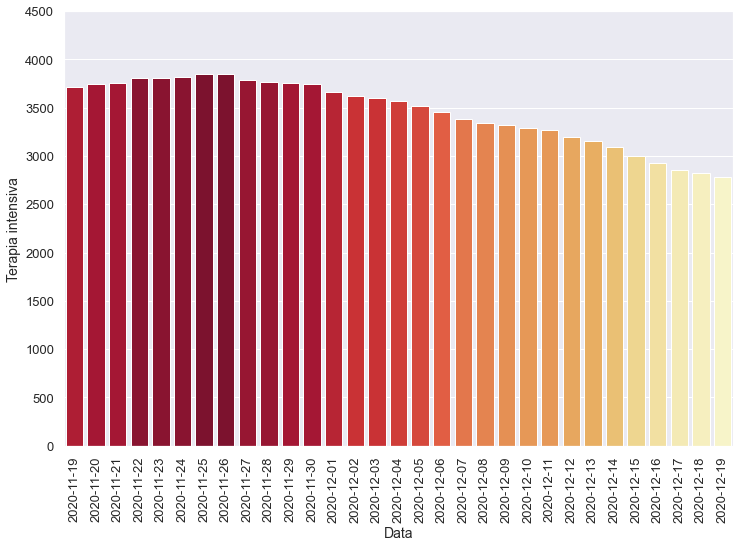

In [28]:
# Positives in ICU in the last 30 days
y_col = 'terapia_intensiva'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

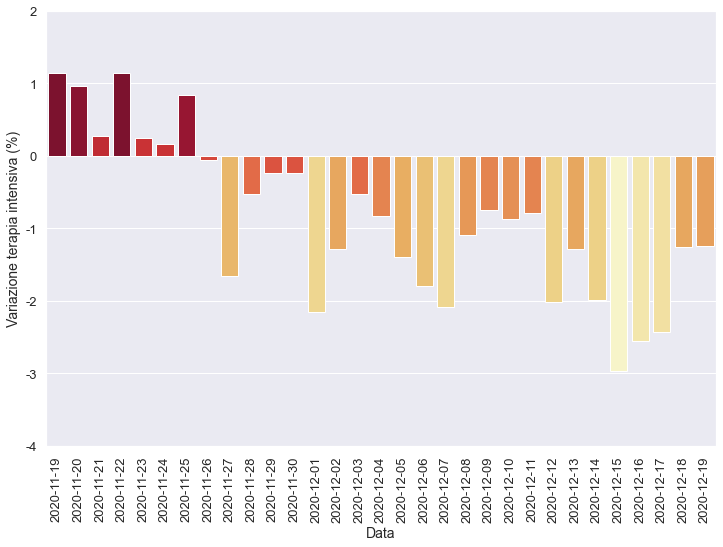

In [29]:
# Percentage of variation of positives in ICU in the last 30 days
y_col = 'var_ti_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

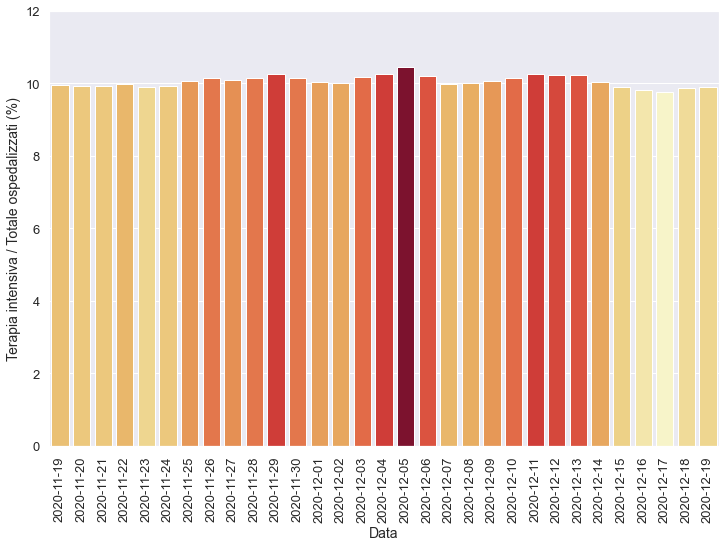

In [30]:
# TODO
y_col = 'ti_su_to'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

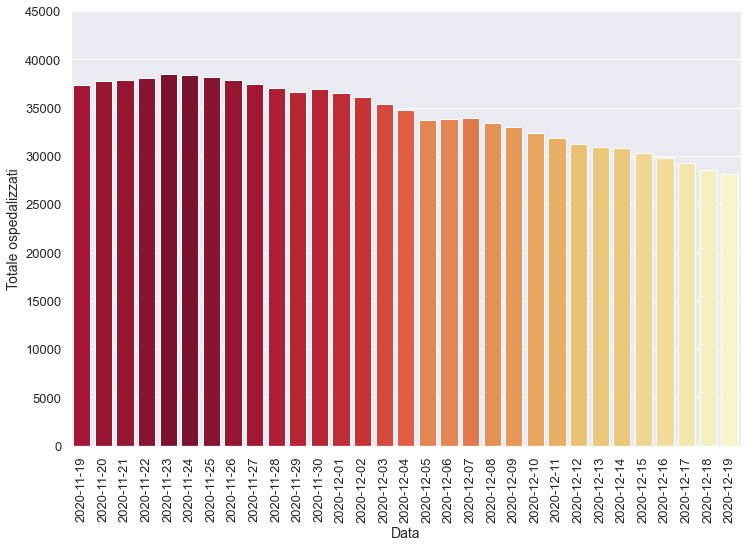

In [31]:
# Hospitalized positives in the last 30 days
y_col = 'totale_ospedalizzati'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

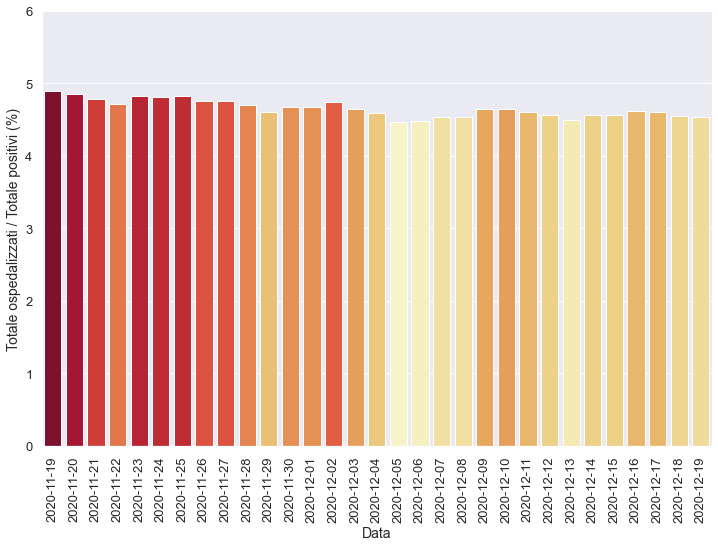

In [32]:
# Hospitalized positives in the last 30 days
y_col = 'to_su_tp'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

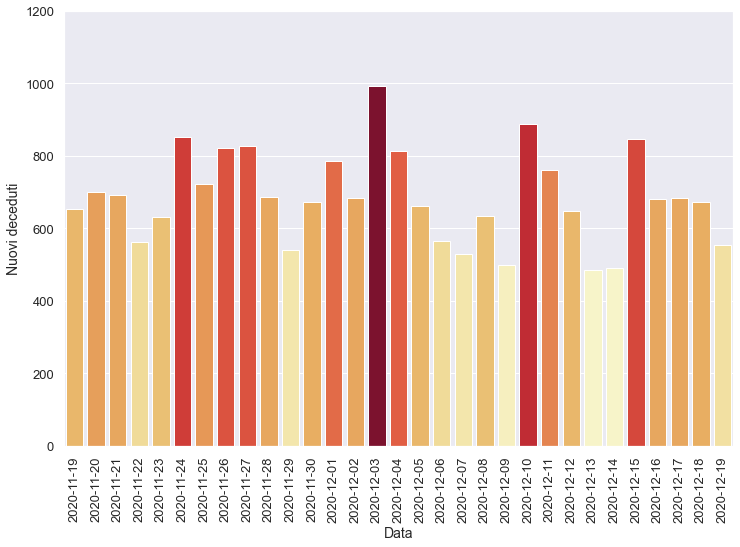

In [33]:
# New deads in the last 30 days
y_col = 'nuovi_deceduti'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

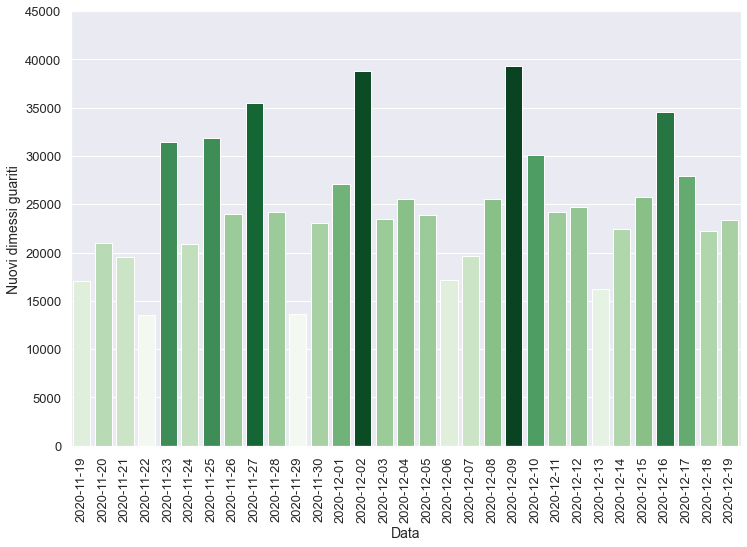

In [34]:
# New healed in the last 30 days
y_col = 'nuovi_dimessi_guariti'
fig = bp.draw_bar_plot(y_col=y_col, color='Greens')
bp.save(fig=fig, y_col=y_col)

In [35]:
# TODO: define function
days = 7
path_img = '{path_img_root}/0{days}gg'.format(path_img_root=path_img_root, days=days)
date_threshold = Functions.get_prev_days_date(last_date, days).toordinal()
date_threshold_str = datetime.datetime.fromordinal(date_threshold).isoformat()
df_n = df_n_raw[df_n_raw.data > date_threshold_str].reset_index(drop=True)
df_n

,data,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,dimessi_guariti,deceduti,...,nuovi_dimessi_guariti,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2020-12-12T17:00:00,28066,3199,31265,653583,684848,-5475,19903,1076891,64036,...,24728.0,649.0,196439.0,78563.0,10.23,4.57,10.13,25.33,-2.02,-0.79
1,2020-12-13T17:00:00,27735,3158,30893,655138,686031,1183,17938,1093161,64520,...,16270.0,484.0,152697.0,70024.0,10.22,4.50,11.75,25.62,-1.28,0.17
2,2020-12-14T17:00:00,27765,3095,30860,644249,675109,-10922,12030,1115617,65011,...,22456.0,491.0,103584.0,51152.0,10.03,4.57,11.61,23.52,-1.99,-1.59
3,2020-12-15T17:00:00,27342,3003,30345,632968,663313,-11796,14844,1141406,65857,...,25789.0,846.0,164431.0,64237.0,9.90,4.57,9.03,23.11,-2.97,-1.75
4,2020-12-16T17:00:00,26897,2926,29823,615883,645706,-17607,17572,1175901,66537,...,34495.0,680.0,199489.0,78972.0,9.81,4.62,8.81,22.25,-2.56,-2.65
5,2020-12-17T17:00:00,26427,2855,29282,606061,635343,-10363,18236,1203814,67220,...,27913.0,683.0,-47510.0,80778.0,9.75,4.61,-38.38,22.58,-2.43,-1.60
6,2020-12-18T17:00:00,25769,2819,28588,599210,627798,-7545,17992,1226086,67894,...,22272.0,674.0,179800.0,-96651.0,9.86,4.55,10.01,-18.62,-1.26,-1.19
7,2020-12-19T17:00:00,25364,2784,28148,592018,620166,-7632,16308,1249470,68447,...,23384.0,553.0,176185.0,75112.0,9.89,4.54,9.26,21.71,-1.24,-1.22


In [36]:
bp.df = df_n
graph_prop['path_root'] = path_img
bp.graph_prop = graph_prop

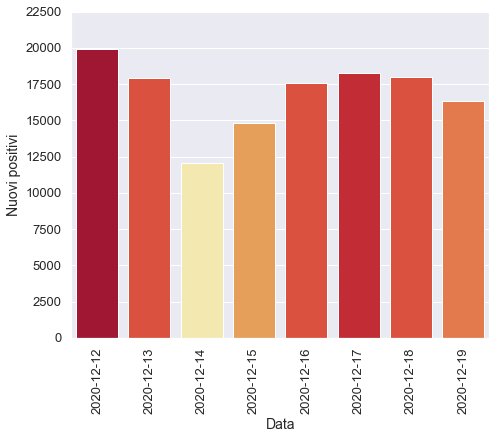

In [37]:
# New positives on new swabs in the last 7 days
y_col = 'nuovi_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

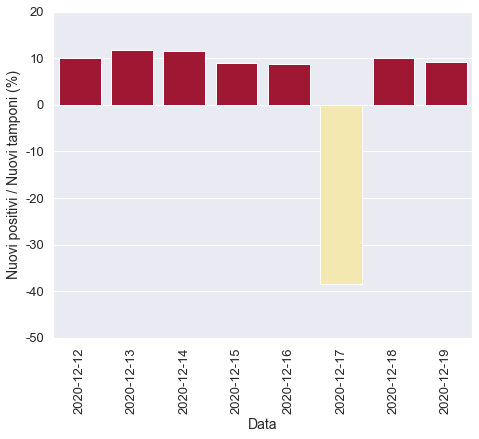

In [38]:
# New positives on new swabs in the last 7 days
y_col = 'np_su_nt'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

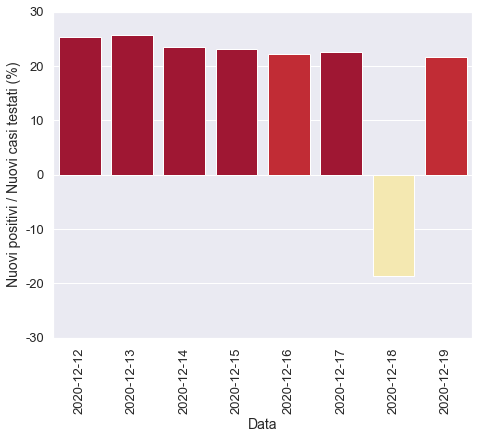

In [39]:
# New positives on new tested cases in the last 7 days
y_col = 'np_su_nct'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

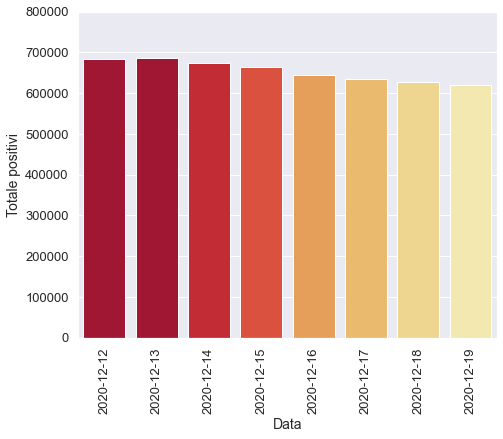

In [40]:
# Percentage of variation of positives in the last 7 days
y_col = 'totale_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

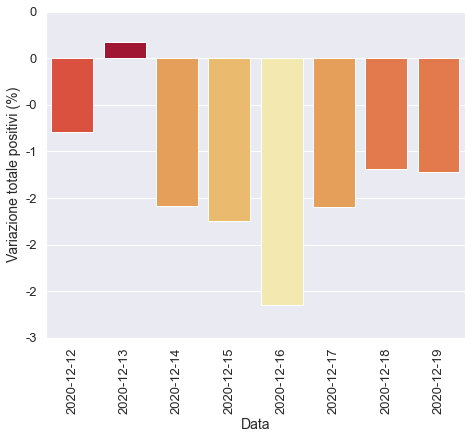

In [41]:
# Percentage of variation of positives in the last 7 days
y_col = 'var_pos_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

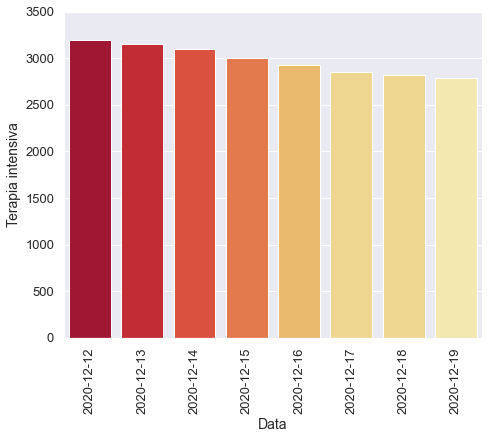

In [42]:
# Positives in ICU in the last 7 days
y_col = 'terapia_intensiva'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

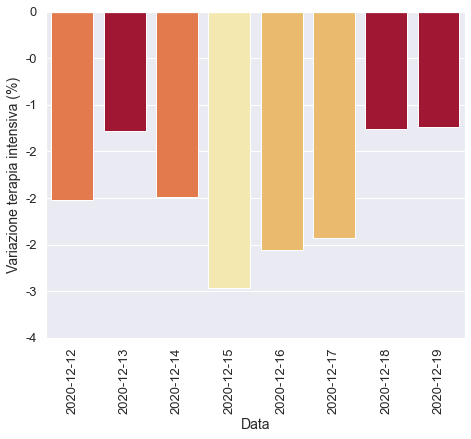

In [43]:
# Percentage of variation of positives in ICU in the last 30 days
y_col = 'var_ti_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

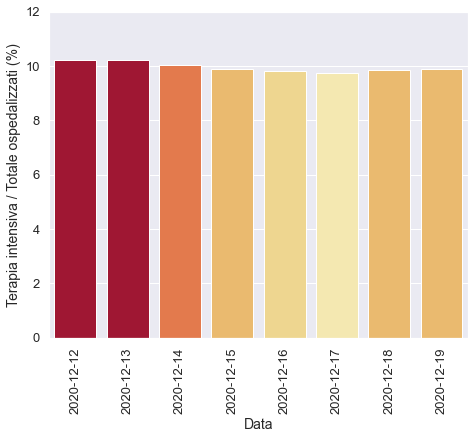

In [44]:
# Positives in ICU in the last 7 days
y_col = 'ti_su_to'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

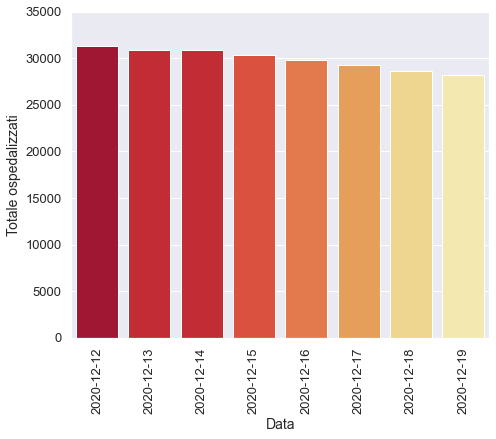

In [45]:
# Hospitalized positives in the last 7 days
y_col = 'totale_ospedalizzati'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

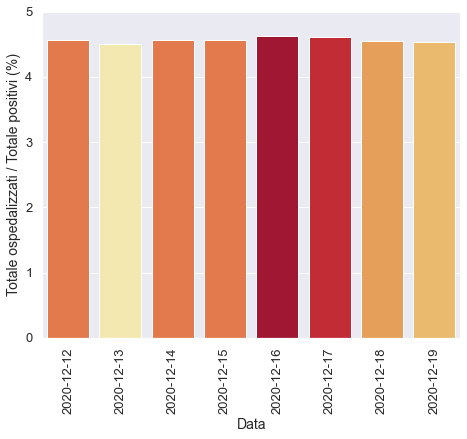

In [46]:
# Hospitalized positives in the last 7 days
y_col = 'to_su_tp'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

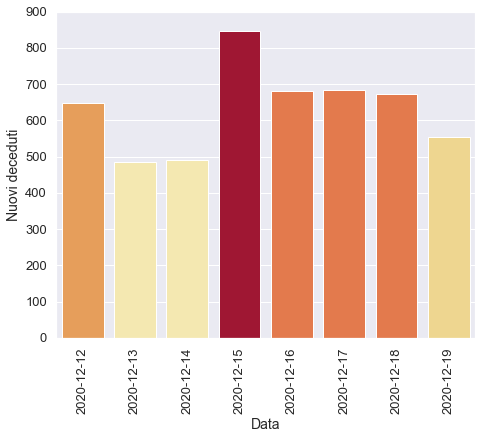

In [47]:
# New deads in the last 7 days
y_col = 'nuovi_deceduti'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

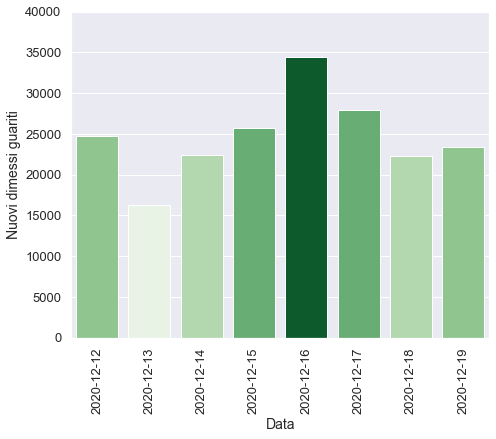

In [48]:
# New healed in the last 7 days
y_col = 'nuovi_dimessi_guariti'
fig = bp.draw_bar_plot(y_col=y_col, color='Greens')
bp.save(fig=fig, y_col=y_col)